In [348]:
folder = '/content/drive/MyDrive/магистратура/Хобби/Images/'

In [349]:
from copy import deepcopy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from random import uniform

In [350]:
def print_img(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [351]:
def get_hist_horizontal(image):
  hist = np.sum(image,axis = 0)/255
  return(hist)


def get_hist_vertical(image):
  hist = np.sum(image,axis = 1)/255
  return(hist)

def count_zeros(image):
  sum_ = np.sum(image)/255
  zer_fraq = 1 - sum_/(image.shape[1])#image.shape[0]*
  return(zer_fraq)

In [352]:
image = cv2.imread(folder+'table_ozon.png')
draw = deepcopy(image)

In [353]:
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [354]:
color_treshold = 150
spec = 0
for element in img_gray.flatten():
  if element >= color_treshold:
    spec += 1
  else:
    spec -= 1

In [355]:
if spec > 0:
  th, img_1 = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)
else:
  th, img_1 = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

In [356]:
img_contours = deepcopy(img_1)

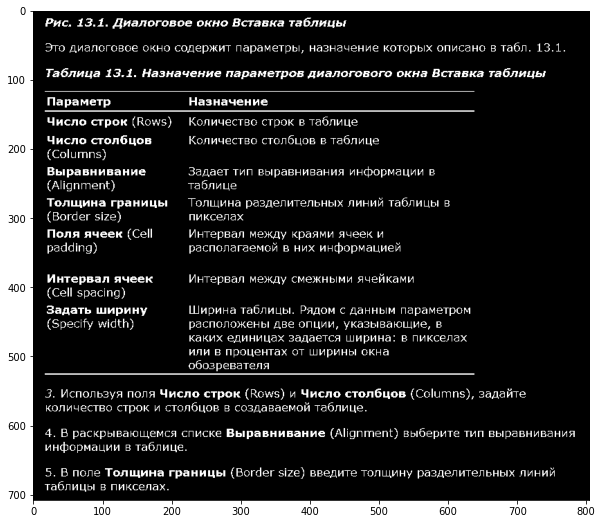

In [357]:
print_img(img_1)

In [358]:
kernel_ver = np.array([
                   [-1,2,-1],
                   [-1,2,-1],
                   [-1,2,-1]
])
img_1 = cv2.filter2D(img_1, -1, kernel_ver)

kernel_hor = np.array([
                   [-1,-1,-1],
                   [2,2,2],
                   [-1,-1,-1]
])
img_1 = cv2.filter2D(img_1, -1, kernel_hor)


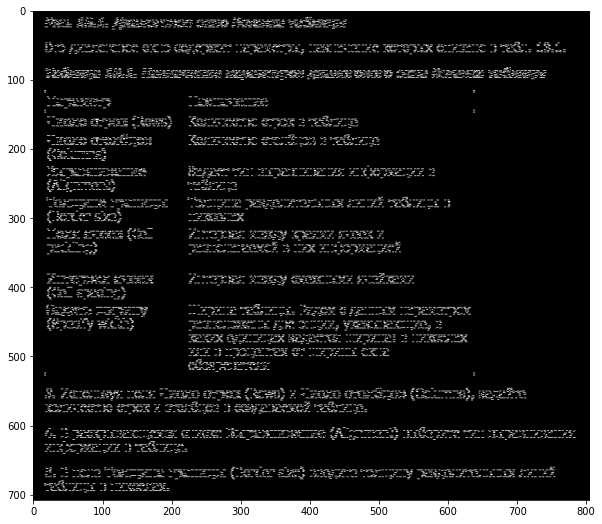

In [359]:
print_img(img_1)

In [360]:
# th, img_1_reverse = cv2.threshold(img_1, 230, 255, cv2.THRESH_BINARY_INV)

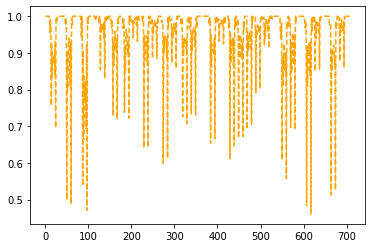

In [361]:
draw = deepcopy(image)
step = 1

metrik_sq = []
for index in range(0,img_1.shape[0]):
  metrik_sq.append(count_zeros(img_1[index:index+1]))
plt.plot([i for i in range(len(metrik_sq))], metrik_sq,'--', color = "orange")

In [365]:
std_less_dots = []
limit = np.std(metrik_sq)
window_size = int(len(metrik_sq)/8)
for index in range(0,len(metrik_sq), window_size):
  win_std = np.std(metrik_sq[index:index+window_size])
  if win_std < limit and win_std > 0:
    std_less_dots.append(index)

In [366]:
filtred_pixels = []
for element in std_less_dots:
  if not filtred_pixels:
    filtred_pixels.append([element])
  elif filtred_pixels[-1][-1]+window_size == element:
    filtred_pixels[-1].append(element)
  else:
    filtred_pixels.append([element])

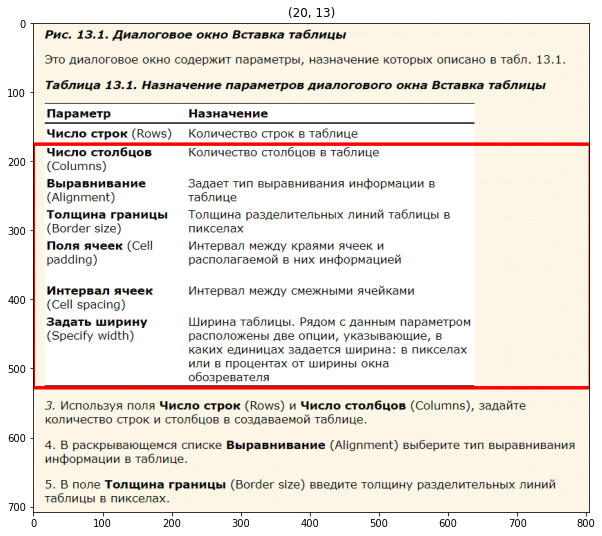

In [367]:
thresh = 10
for element in filtred_pixels:
  start = min(element)
  end = max(element)+window_size
  if np.var(get_hist_horizontal(img_1[start:end]))> thresh:
    draw = cv2.line(draw, (0,start),(draw.shape[1],start), [0,0,255],3)
    draw = cv2.line(draw, (0,start),(0,end), [0,0,255],3)
    draw = cv2.line(draw, (draw.shape[1],start),(draw.shape[1],end), [0,0,255],3)
    draw = cv2.line(draw, (0,end),(draw.shape[1],end),[0,0,255],3)
print_img(draw,(20,13))